In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
from textstat import flesch_reading_ease
import seaborn as sns

sns.set_theme()

# Modifica dati

In [68]:
work = pd.read_csv("workers_data_filtered.csv")

def abc(x):
    if(x.doc_source=='abc'):
        if 'In_Between' in x.doc_name:
            return 'in-between'
        if 'Positive' in x.doc_name:
            return 'positive'
        if 'Negative' in x.doc_name:
            return 'negative'
        
    return np.nan

def poli(x):
    if(x.doc_source=='politifact'):
        if 'HALFTRUE' in x.doc_name:
            return 'half-true'
        if 'LIE' in x.doc_name:
            return 'pants-on-fire'
        if 'MOSTLYTRUE' in x.doc_name:
            return 'mostly-true'
        if 'BARELYTRUE' in x.doc_name:
            return 'barely-true'
        if 'TRUE' in x.doc_name:
            return 'true'
        if 'FALSE' in x.doc_name:
            return 'false'
        
    return np.nan

work['doc_ground_truth_abc_label']=work[['doc_source','doc_name']].apply(abc,axis=1)
work['doc_ground_truth_politifact_label']=work[['doc_source','doc_name']].apply(poli,axis=1)

work.to_csv('workers_data_filtered.csv',index=False)

In [2]:
work = pd.read_csv("workers_data_filtered.csv")
# all=pd.DataFrame(columns=work.columns)
# for name in work['doc_name'].unique():
#     if name not in ['HIGH','LOW']:
#         all=pd.concat([all, work.loc[work.doc_name==name].sample(n=9, random_state=42)])
# pathlib.Path("../Dati").mkdir(parents=True, exist_ok=True) 
# all.to_csv("../Dati/multidimensional_v2.csv", index=False)
work.to_csv("../Dati/multidimensional_v2.csv", index=False)

# Caricamento dati

In [3]:
dataf = pd.read_csv("../Dati/multidimensional_v2.csv")
dataf

,try_last,batch_name,unit_id,tries_amount,questionnaire_amount,document_amount,dimensions_amount,current_try,q_0_time_elapsed,q_0_accesses,...,q_1_farmers_answer,q_1_farmers_question,q_2_marks_value,q_2_marks_answer,q_2_marks_question,q_3_athletics_value,q_3_athletics_answer,q_3_athletics_question,doc_ground_truth_abc_label,doc_ground_truth_politifact_label
0,1,V2-Batch-2,unit_53,10,6,11,10,1,41.13,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,4,NaN,"In an athletics team, females won four times m...",NaN,NaN
1,1,V2-Batch-2,unit_53,10,6,11,10,1,41.13,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,4,NaN,"In an athletics team, females won four times m...",NaN,barely-true
2,1,V2-Batch-2,unit_53,10,6,11,10,1,41.13,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,4,NaN,"In an athletics team, females won four times m...",NaN,mostly-true
3,1,V2-Batch-2,unit_53,10,6,11,10,1,41.13,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,4,NaN,"In an athletics team, females won four times m...",NaN,true
4,1,V2-Batch-2,unit_53,10,6,11,10,1,41.13,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,4,NaN,"In an athletics team, females won four times m...",NaN,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,2,V2-Batch-1,unit_123,9,6,11,10,2,21.32,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,5,NaN,"In an athletics team, females won four times m...",NaN,pants-on-fire
3226,2,V2-Batch-1,unit_123,9,6,11,10,2,21.32,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,5,NaN,"In an athletics team, females won four times m...",NaN,barely-true
3227,2,V2-Batch-1,unit_123,9,6,11,10,2,21.32,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,5,NaN,"In an athletics team, females won four times m...",negative,NaN
3228,2,V2-Batch-1,unit_123,9,6,11,10,2,21.32,1,...,NaN,If three farmers can plant three trees in thre...,9,NaN,Sean received both the 5th highest and the 5th...,5,NaN,"In an athletics team, females won four times m...",positive,NaN


# Elimina colonne che non servono all'analisi

In [ ]:
print([col for col in dataf])

In [2]:
def shorten_school(x):
    if x.startswith('F'):
        return '4 year college/bachelor degree'
    elif x.startswith('H'):
        return 'High school graduate or GED (etc.)'
    elif x.startswith('P'):
        return 'Postgrad. or professional degree (etc.)'
    elif x.startswith('Some c'):
        return 'Some college (etc.)'
    elif x.startswith('Some p'):
        return 'Postgrad. or professional schooling, no degree'

In [5]:
data=dataf[[col for col in dataf if 
            col=='unit_id' or
            col=='current_try' or
            (col.startswith('q_0') and col.endswith('answer')) or
            (col.startswith(('q_1','q_2','q_3')) and col.endswith(('question','value'))) or
            col.endswith('elapsed') or
            (col.startswith('doc_') and (col.endswith(('politifact_label','abc_label','accesses','doc_overall-truthfulness_url')) or not col.endswith(('label','justification','url')))) #or
            # col=='query_amount' or
            # col=='response_position' or
            # col=='selected_amount' or
            # col.startswith('sim')
             ]]
# data=data.loc[data['doc_name']!='DEM_BARELYTRUE_doc7']

data['q_1_farmers_value']=data['q_1_farmers_value'].map(lambda x: 'correct value' if x==3 else 'wrong value')
data['q_2_marks_value']=data['q_2_marks_value'].map(lambda x: 'correct value' if x==9 else 'wrong value')
data['q_3_athletics_value']=data['q_3_athletics_value'].map(lambda x: 'correct value' if x==4 else 'wrong value')
    
data['q_0_school_answer']=data['q_0_school_answer'].map(shorten_school)
data

<ipython-input-5-a131d4a978a8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q_1_farmers_value']=data['q_1_farmers_value'].map(lambda x: 'correct value' if x==3 else 'wrong value')
<ipython-input-5-a131d4a978a8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q_2_marks_value']=data['q_2_marks_value'].map(lambda x: 'correct value' if x==9 else 'wrong value')
<ipython-input-5-a131d4a978a8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,unit_id,current_try,q_0_time_elapsed,q_1_time_elapsed,q_2_time_elapsed,q_3_time_elapsed,doc_index,doc_name,doc_statement,doc_claimant,...,q_0_southern_border_answer,q_0_environment_answer,q_1_farmers_value,q_1_farmers_question,q_2_marks_value,q_2_marks_question,q_3_athletics_value,q_3_athletics_question,doc_ground_truth_abc_label,doc_ground_truth_politifact_label
0,unit_53,1,41.13,6.34,5.52,10.49,0,HIGH,"Yes, We can!",Barack Obama,...,Agree,Agree,correct value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,correct value,"In an athletics team, females won four times m...",NaN,NaN
1,unit_53,1,41.13,6.34,5.52,10.49,1,DEM_BARELYTRUE_doc5,John McCain worries about nuclear waste in Ari...,Barack Obama,...,Agree,Agree,correct value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,correct value,"In an athletics team, females won four times m...",NaN,barely-true
2,unit_53,1,41.13,6.34,5.52,10.49,2,DEM_MOSTLYTRUE_doc5,"Carly Fiorina, shes against banning assault we...",Barbara Boxer,...,Agree,Agree,correct value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,correct value,"In an athletics team, females won four times m...",NaN,mostly-true
3,unit_53,1,41.13,6.34,5.52,10.49,3,REP_TRUE_doc5,John McCain stood up to the president and soun...,John Mccain,...,Agree,Agree,correct value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,correct value,"In an athletics team, females won four times m...",NaN,true
4,unit_53,1,41.13,6.34,5.52,10.49,4,REP_FALSE_doc5,"Obama says Iran is a tiny country, doesnt pose...",John Mccain,...,Agree,Agree,correct value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,correct value,"In an athletics team, females won four times m...",NaN,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,unit_123,2,21.32,40.18,106.12,29.71,6,REP_LIE_doc2,Says the congressional ethics investigation ag...,Newt Gingrich,...,Disagree,Agree,wrong value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,wrong value,"In an athletics team, females won four times m...",NaN,pants-on-fire
3226,unit_123,2,21.32,40.18,106.12,29.71,7,REP_BARELYTRUE_doc2,The expiration of the Bush-era tax cuts ... wo...,Charles Bass,...,Disagree,Agree,wrong value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,wrong value,"In an athletics team, females won four times m...",NaN,barely-true
3227,unit_123,2,21.32,40.18,106.12,29.71,8,Labor_Negative_doc6,Tanya Plibersek says the last time there was o...,Tanya Plibersek,...,Disagree,Agree,wrong value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,wrong value,"In an athletics team, females won four times m...",negative,NaN
3228,unit_123,2,21.32,40.18,106.12,29.71,9,Labor_Positive_doc7,Chris Bowen says Joe Hockey has doubled the de...,Chris Bowen,...,Disagree,Agree,wrong value,If three farmers can plant three trees in thre...,correct value,Sean received both the 5th highest and the 5th...,wrong value,"In an athletics team, females won four times m...",positive,NaN


# Creazione file rows

In [3]:
#numero di statement da selezionare per file delle analisi
n_stat=10

In [4]:
columns=['current_try' ,'q_0_age_answer', 'q_0_school_answer', 'q_0_taxes_answer',
 'q_0_political_views_answer' ,'q_0_consideration_answer',
 'q_0_southern_border_answer', 'q_0_environment_answer', 'q_1_farmers_value',
 'q_2_marks_value' ,'q_3_athletics_value' ,'doc_index', 'doc_name',
 'doc_claimant', 'doc_date' ,'doc_source' ,'doc_overall-truthfulness_value',
 'doc_confidence_value', 'doc_correctness_value' ,'doc_neutrality_value',
 'doc_comprehensibility_value' ,'doc_precision_value',
 'doc_completeness_value' ,"doc_speaker's-trustworthiness_value",
 'doc_informativeness_value', 'doc_accesses','doc_overall-truthfulness_url']

columns_other=['doc_time_elapsed']#,'query_amount','response_position','selected_amount','sim_statem_query','sim_statem_resname','sim_statem_ressnip']


In [8]:
def create_rows_file(data, wrong_correct, false_true, false_true_labels, source, mean_col, n_stat, col_list):
#false_true_labels: lista con 1 elemento se source != 'all', altrimenti 2 elementi ['label_abc', 'label_politifact']
    source=source.lower()
    if(source=='all'):
        data_rows=data.loc[(data['doc_ground_truth_abc_label']==false_true_labels[0]) | (data['doc_ground_truth_politifact_label']==false_true_labels[1])]
    else:
        n_stat=int(n_stat/2)
        data_rows=data.loc[data[f"doc_ground_truth_{source}_label"]==false_true_labels[0]]
    

    # r=data_rows.copy()
    # length=len(r)
    
    # df=pd.DataFrame(columns=['type','value','rate'])
    # for col in col_list:
    #     if(col=='doc_overall-truthfulness_url'):
    #         r['doc_overall-truthfulness_url']=r['doc_overall-truthfulness_url'].map(lambda x: x.split("/")[2])
    #     if(col=='doc_name'):
    #         r['doc_name']=r['doc_name'].map(lambda x: x.split('_')[0])
            
    #     d=r.groupby(col,as_index = False).size().rename(columns={'size':'rate', col:'value'})
    #     d['rate']/=length
    
    #     d.insert(loc=0, column='type', value=col)
    #     df=pd.concat([df, d])
            
    # pathlib.Path(f"../Dati/ratio_data").mkdir(parents=True, exist_ok=True) 
    # df.to_csv(f"../Dati/ratio_data/ratio_{false_true}_{source}_{n_stat}.csv", index=False)
    
    statements_rows=data_rows.groupby('doc_name',as_index = False)[mean_col].mean().sort_values(by=mean_col)
    if((wrong_correct=='wrong' and false_true=='false') or (wrong_correct=='correct' and false_true=='true')):
        statements_rows=statements_rows.tail(n_stat)['doc_name'].values
    else:
        statements_rows=statements_rows.head(n_stat)['doc_name'].values

    rows=data_rows.loc[data_rows['doc_name'].isin(statements_rows)]
    pathlib.Path(f"../Dati/rows").mkdir(parents=True, exist_ok=True) 
    rows.to_csv(f"../Dati/rows/{wrong_correct}_{false_true}_{source}_{n_stat}.csv", index=False)

In [9]:
create_rows_file(data,'wrong','false',['pants-on-fire'],'POLITIFACT','doc_overall-truthfulness_value',n_stat, columns+['query_amount','response_position','selected_amount'])

In [10]:
create_rows_file(data,'wrong','true',['true'],'POLITIFACT','doc_overall-truthfulness_value',n_stat, columns+['query_amount','response_position','selected_amount'])

In [11]:
create_rows_file(data,'correct','false',['pants-on-fire'],'POLITIFACT','doc_overall-truthfulness_value',n_stat, columns+['query_amount','response_position','selected_amount'])

In [12]:
create_rows_file(data,'correct','true',['true'],'POLITIFACT','doc_overall-truthfulness_value',n_stat, columns+['query_amount','response_position','selected_amount'])

## File unici

In [13]:
filenames_rows = next(os.walk("../Dati/rows"), (None, None, []))[2]
df=pd.DataFrame()
for f in filenames_rows:
    r=pd.read_csv(f"../Dati/rows/{f}")
    r.insert(0, 'type', f.split(".")[0])
    df=pd.concat([df,r])
    df.to_csv(f"../Dati/all_rows_v2.csv",index=False)
    os.remove(f"../Dati/rows/{f}")
os.rmdir(f"../Dati/rows") 


## Statement groupby

In [3]:
transf_cols={
    'q_0_age_answer':['19-25', '26-35', '36-50', '50-80'],
    'q_0_school_answer': ['High school graduate or GED (etc.)', 'Some college (etc.)', '4 year college/bachelor degree', 'Postgrad. or professional schooling, no degree', 'Postgrad. or professional degree (etc.)'],
    'q_0_taxes_answer': ['Less than 10,000','10,000 to less than 20,000','20,000 to less than 30,000','30,000 to less than 40,000','40,000 to less than 50,000','50,000 to less than 75,000','75,000 to less than 100,000','100,000 to less than 150,000','150,000 or more'],
    'q_0_political_views_answer':['Very conservative', 'Conservative', 'Moderate', 'Liberal', 'Very liberal'],
    'q_0_consideration_answer':['Republican','Democrat','Independent','Something else'],
    'q_0_southern_border_answer':['Disagree','No opinion either way','Agree'],
    'q_0_environment_answer':['Disagree','No opinion either way','Agree'],
    'q_1_farmers_value':['wrong value','correct value'],
    'q_2_marks_value':['wrong value','correct value'],
    'q_3_athletics_value':['wrong value','correct value'],
}

def transf_data(rows, tr_dict):
    rows['doc_name']=rows['doc_name'].map(lambda x: x.split('_')[0])
    rows['fre']=rows['doc_statement'].apply(lambda x : flesch_reading_ease(x))
    for k,v in tr_dict.items():
        rows[k]=pd.Categorical(rows[k], categories = v, ordered = True).codes


In [6]:
r= pd.read_csv("../Dati/all_rows_v2.csv")
r=r[r['type'].apply(lambda x: x.endswith('_politifact_5'))]

d=r.copy()
transf_data(d, transf_cols)
df=d[columns+['doc_statement','type','fre']+columns_other].drop(['doc_claimant', 'doc_overall-truthfulness_url'], axis=1)

df_stat=df.groupby(['type', 'doc_statement'], as_index = False).mean().sort_values(by=['type','doc_overall-truthfulness_value'])

def transf_back(x):
    for k,v in transf_cols.items():
        x[k]=f"{v[round(float(x[k]))]} ({float(x[k]):.2f})"
    return x

df_stat=df_stat.apply(transf_back, axis=1)

df_stat['doc_name']=df_stat.apply(lambda x: r.loc[r.doc_statement == x.doc_statement, 'doc_name'].values[0], axis=1)
df_stat['doc_claimant']=df_stat.apply(lambda x: r.loc[r.doc_statement == x.doc_statement, 'doc_claimant'].values[0], axis=1)

df_stat.to_csv('../Dati/groupby_statement_v2.csv', index=False)

In [8]:
r= pd.read_csv("../Dati/all_rows_v1.csv")
r=r[r['type'].apply(lambda x: x.endswith('_politifact_5'))]

d=r.copy()
transf_data(d, transf_cols)
df=d[columns+['doc_statement','type','fre']+columns_other].drop(['doc_claimant', 'doc_overall-truthfulness_url'], axis=1)

df_stat=df.groupby(['type', 'doc_statement'], as_index = False).mean().sort_values(by=['type','doc_overall-truthfulness_value'])

def transf_back(x):
    for k,v in transf_cols.items():
        x[k]=f"{v[round(float(x[k]))]} ({float(x[k]):.2f})"
    return x

df_stat=df_stat.apply(transf_back, axis=1)

df_stat['doc_name']=df_stat.apply(lambda x: r.loc[r.doc_statement == x.doc_statement, 'doc_name'].values[0], axis=1)
df_stat['doc_claimant']=df_stat.apply(lambda x: r.loc[r.doc_statement == x.doc_statement, 'doc_claimant'].values[0], axis=1)

df_stat.to_csv('../Dati/groupby_statement_v1.csv', index=False)

In [13]:
all=pd.DataFrame()
for n in range(1,3):
    all=pd.concat([all,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})
count
for t in count.type.unique():
    for s in count['in_common'].unique():
        df=pd.DataFrame()
        names=count.loc[(count['in_common']==s) & (count.type==t), 'doc_name'].values
        for i in range(1,3):
            polit=pd.read_csv(f"../Dati/groupby_statement_v{i}.csv")
            row=polit.loc[(polit.type==t) & (np.isin(polit.doc_name,names))]
            if(len(row)>0):
                row.insert(0, 'file', f"political_{i}")
                df=pd.concat([df, row])
        
        pathlib.Path(f"../Dati/grouped/{t}").mkdir(parents=True, exist_ok=True) 
        df.to_csv(f"../Dati/grouped/{t}/all_{s}_{t}.csv", index=False)

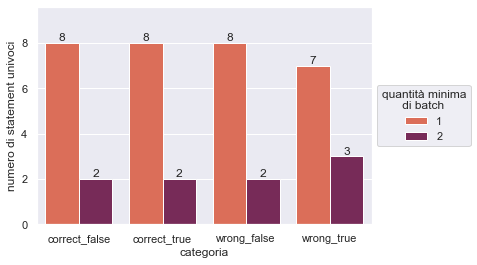

In [26]:
all=pd.DataFrame()
for n in range(1,3):
    all=pd.concat([all,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})

count=count.value_counts(['type','in_common']).reset_index().rename(columns={0:'how_many'})
count['type']=count['type'].map(lambda x: x.split('_')[0]+'_'+x.split('_')[1] )
count.loc[count.in_common==1, 'how_many']=count.loc[count.in_common==1].apply(lambda x: x.how_many+count.loc[(count.in_common==2) & (count.type==x.type), 'how_many'].values[0], axis=1)
count['batch in comune']=count['in_common']
ax=sns.barplot(x='type', y='how_many', hue='batch in comune', palette='rocket_r', data=count)
ax.set_xlabel("categoria")
ax.set_ylabel("numero di statement univoci")
# ax.set_title("Numero di statement per ciascuna categoria,\nper ogni quantità di batch in comune")
for c in ax.containers:
    labels = [f'{int(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.margins(y=0.2)
ax.legend(title="quantità minima\n      di batch",loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../Dati/nstatem_in_comune_type.png', bbox_inches='tight')

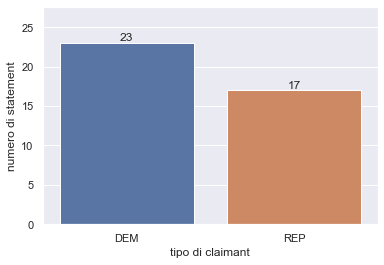

In [6]:
all=pd.DataFrame()
for n in range(1,3):
    all=pd.concat([all,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})
count['doc_name']=count['doc_name'].map(lambda x: x.split('_')[0])
count=count.value_counts(['in_common','doc_name']).reset_index().rename(columns={0:'how_many'})

count['how_many']=count.apply(lambda x: x.in_common*x.how_many, axis=1)
count=count.groupby('doc_name').sum().reset_index()
ax=sns.barplot(x='doc_name', y='how_many', data=count)
ax.set_xlabel("tipo di claimant")
ax.set_ylabel("numero di statement")
# ax.set_title("Numero di statement per ciascun tipo di claimant")
for c in ax.containers:
    labels = [f'{int(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.margins(y=0.2)
plt.savefig('../Dati/nstatem_claimant.png', bbox_inches='tight')

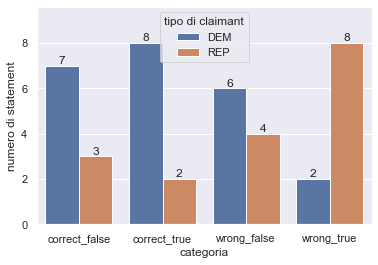

In [13]:
all=pd.DataFrame()
for n in range(1,3):
    all=pd.concat([all,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})
count['claimant']=count['doc_name'].map(lambda x: x.split('_')[0])
count=count.value_counts(['type','in_common','claimant']).reset_index().rename(columns={0:'how_many'})

count['how_many']=count.apply(lambda x: x.in_common*x.how_many, axis=1)
count=count.groupby(['type','claimant']).sum().reset_index()
count['type']=count['type'].map(lambda x: x.split('_')[0]+'_'+x.split('_')[1] )
ax=sns.barplot(x='type', y='how_many', hue='claimant', data=count)
ax.set_xlabel("categoria")
ax.set_ylabel("numero di statement")
# ax.set_title("Numero di statement per ciascuna categoria, per tipo di claimant")
for c in ax.containers:
    labels = [f'{int(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.margins(y=0.2)
ax.legend(title='tipo di claimant',loc='upper center')
plt.savefig('../Dati/nstatem_claimant_cat.png', bbox_inches='tight')

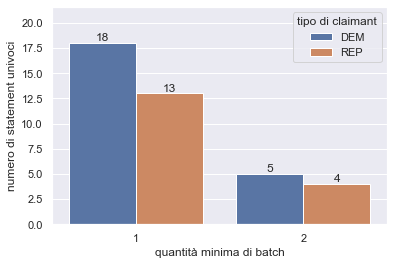

In [17]:
all=pd.DataFrame()
for n in range(1,3):
    all=pd.concat([all,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})
count['claimant']=count['doc_name'].map(lambda x: x.split('_')[0])

count=count.value_counts(['in_common','claimant']).reset_index().rename(columns={0:'how_many'})
count
count.loc[count.in_common==1, 'how_many']=count.loc[count.in_common==1].apply(lambda x: x.how_many+count.loc[(count.in_common==2) & (count.claimant==x.claimant), 'how_many'].values[0], axis=1)
ax=sns.barplot(x='in_common', y='how_many', hue='claimant', data=count)
ax.set_xlabel("quantità minima di batch")
ax.set_ylabel("numero di statement univoci")
# ax.set_title("Numero di statement per ciascuna quantità di batch in comune,\ndiviso per tipo di claimant")
for c in ax.containers:
    labels = [f'{int(v.get_height())}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.margins(y=0.2)
ax.legend(title='tipo di claimant')
plt.savefig('../Dati/nstatem_in_comune_claimant.png', bbox_inches='tight')

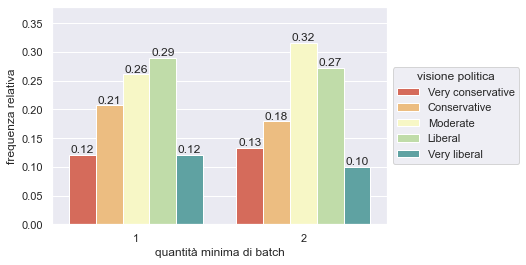

In [19]:
all_r=pd.DataFrame()
all_g=pd.DataFrame()
for n in range(1,3):
    all_r=pd.concat([all_r,pd.read_csv(f"../Dati/all_rows_v{n}.csv")])
    all_g=pd.concat([all_g,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all_g.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})
names_1=count.doc_name.values
names_2=count.loc[count.in_common==2, 'doc_name'].values

count_1=all_r.loc[np.isin(all_r.doc_name, names_1)].value_counts(['q_0_political_views_answer'], normalize=True).reset_index().rename(columns={0:'how_many'})
count_2=all_r.loc[np.isin(all_r.doc_name, names_2)].value_counts(['q_0_political_views_answer'], normalize=True).reset_index().rename(columns={0:'how_many'})
count_1.insert(0, 'in_common', 1)
count_2.insert(0, 'in_common', 2)
count=pd.concat([count_1,count_2])
count['visione politica']=count['q_0_political_views_answer']
count

ax=sns.barplot(x='in_common', y='how_many', hue='visione politica', palette='Spectral', hue_order=['Very conservative', 'Conservative', 'Moderate', 'Liberal', 'Very liberal'], data=count)
ax.set_xlabel("quantità minima di batch")
ax.set_ylabel("frequenza relativa")
# ax.set_title("Visione politica dei worker per ogni quantità di batch in comune")
for c in ax.containers:
    labels = [f'{v.get_height():.2f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
ax.margins(y=0.2)
ax.legend(title='visione politica',loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../Dati/visione_in_comune_.png', bbox_inches='tight')

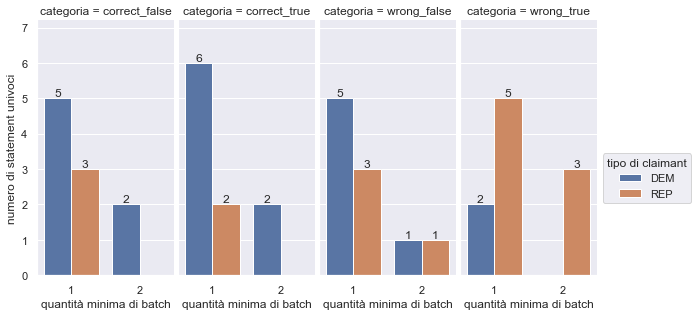

In [39]:
all=pd.DataFrame()
for n in range(1,3):
    all=pd.concat([all,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})
count['claimant']=count['doc_name'].map(lambda x: x.split('_')[0])
count=count.value_counts(['type','in_common','claimant']).reset_index().rename(columns={0:'how_many'})
count.loc[count.in_common==1, 'how_many']=count.loc[count.in_common==1].apply(lambda x: x.how_many+count.loc[(count.in_common==2) & (count.claimant==x.claimant) & (count.type==x.type), 'how_many'].values[0]
                                                                              if len(count.loc[(count.in_common==2) & (count.claimant==x.claimant) & (count.type==x.type), 'how_many'])>0 else x.how_many, axis=1)

count['categoria']=count['type'].map(lambda x: x.split('_')[0]+'_'+x.split('_')[1] )

ax=sns.catplot(x='in_common', y='how_many', hue='claimant',height=7, col='categoria', legend=False, col_order=['correct_false','correct_true','wrong_false','wrong_true'], kind="bar",data=count)
ax.set_xlabels("quantità minima di batch")
ax.set_ylabels("numero di statement univoci")
ax.fig.subplots_adjust(top=0.8)
ax.fig.set_figwidth(8)
ax.fig.set_figheight(5)
# ax.fig.suptitle("Numero di statement per ciascuna quantità di batch in comune,\ndiviso per tipo di claimant, per ogni categoria")

for a in ax.axes.ravel():
    for c in a.containers:
        labels = [f'{int(v.get_height())}' if not np.isnan(v.get_height()) else "" for v in c]
        a.bar_label(c, labels=labels, label_type='edge')
    a.margins(y=0.2)
plt.legend(title='tipo di claimant', bbox_to_anchor=(1, 0.5))
plt.savefig('../Dati/nstatem_in_comune_both.png', bbox_inches='tight')

In [9]:
all=pd.DataFrame()
for n in range(1,3):
    all=pd.concat([all,pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")])
count=all.value_counts(['type','doc_name']).reset_index().rename(columns={0:'in_common'})
names=count.loc[count.in_common==2, 'doc_name'].values
all=all.loc[np.isin(all.doc_name, names)].drop_duplicates('doc_name')
all=all[['type', 'doc_statement', 'doc_name', 'doc_date',  'doc_claimant','fre' ]]
all['doc_name']=all['doc_name'].map(lambda x: x.split('_')[0])
all['doc_date']=all['doc_date'].astype('int64')
all.to_csv('../Dati/all_in_common_2.csv', index=False)

In [16]:
all=pd.DataFrame()
for n in range(1,3):
    read=pd.read_csv(f"../Dati/groupby_statement_v{n}.csv")
    read.insert(0,'batch', n)
    all=pd.concat([all,read])
    
corr_f=all[all.type=='correct_false_politifact_5'].doc_name.values
wro_f=all[all.type=='wrong_false_politifact_5'].sort_values('doc_name').drop_duplicates('doc_name').doc_name.values

corr_t=all[all.type=='correct_true_politifact_5'].doc_name.values
wro_t=all[all.type=='wrong_true_politifact_5'].sort_values('doc_name').drop_duplicates('doc_name').doc_name.values

intersec_names_f=[x for x in wro_f if x in corr_f]
intersec_names_t=[x for x in wro_t if x in corr_t]

intersec_names=intersec_names_f+intersec_names_t

intersec_names

all['categoria']=all['type'].map(lambda x: x.split('_')[0]+' '+x.split('_')[1] )
all['giudizio']=all['doc_overall-truthfulness_value']


all=all[np.isin(all.doc_name, intersec_names)].sort_values(['doc_name','categoria'])


all[['doc_name','categoria','batch', 'giudizio']].to_csv('../Dati/intersez_statem_all.csv', index=False)

all['statement']=all['doc_statement']
all['data']=all['doc_date']
all['claimant']=all['doc_claimant']

all[['doc_name','statement', 'data', 'claimant', 'fre']].drop_duplicates('doc_name').to_csv('../Dati/intersez_statem.csv', index=False)

In [14]:
docs=['DEM_LIE_doc5',
'REP_LIE_doc5',
'REP_LIE_doc7',
'DEM_TRUE_doc9',
'DEM_TRUE_doc5',
'DEM_LIE_doc6',
'REP_LIE_doc9',
'DEM_TRUE_doc6',
'REP_TRUE_doc4',
'REP_LIE_doc3',
'DEM_LIE_doc10',
'DEM_LIE_doc2',
'DEM_TRUE_doc1',
'DEM_TRUE_doc4',
'DEM_LIE_doc8',
'REP_TRUE_doc8']

columns=['current_try' ,'q_0_age_answer', 'q_0_school_answer', 'q_0_taxes_answer',
 'q_0_political_views_answer' ,'q_0_consideration_answer',
 'q_0_southern_border_answer', 'q_0_environment_answer', 'q_1_farmers_value',
 'q_2_marks_value' ,'q_3_athletics_value' ,'doc_index', 'doc_name',
 'doc_claimant', 'doc_date' ,'doc_source' ,'doc_overall-truthfulness_value',
 'doc_confidence_value', 'doc_correctness_value' ,'doc_neutrality_value',
 'doc_comprehensibility_value' ,'doc_precision_value',
 'doc_completeness_value' ,"doc_speaker's-trustworthiness_value",
 'doc_informativeness_value', 'doc_accesses','doc_overall-truthfulness_url']

columns_other=['doc_time_elapsed']#,'query_amount','response_position','selected_amount','sim_statem_query','sim_statem_resname','sim_statem_ressnip']

transf_cols={
    'q_0_age_answer':['19-25', '26-35', '36-50', '50-80'],
    'q_0_school_answer': ['High school graduate or GED (etc.)', 'Some college (etc.)', '4 year college/bachelor degree', 'Postgrad. or professional schooling, no degree', 'Postgrad. or professional degree (etc.)'],
    'q_0_taxes_answer': ['Less than 10,000','10,000 to less than 20,000','20,000 to less than 30,000','30,000 to less than 40,000','40,000 to less than 50,000','50,000 to less than 75,000','75,000 to less than 100,000','100,000 to less than 150,000','150,000 or more'],
    'q_0_political_views_answer':['Very conservative', 'Conservative', 'Moderate', 'Liberal', 'Very liberal'],
    'q_0_consideration_answer':['Republican','Democrat','Independent','Something else'],
    'q_0_southern_border_answer':['Disagree','No opinion either way','Agree'],
    'q_0_environment_answer':['Disagree','No opinion either way','Agree'],
    'q_1_farmers_value':['wrong value','correct value'],
    'q_2_marks_value':['wrong value','correct value'],
    'q_3_athletics_value':['wrong value','correct value'],
}

def transf_data(rows, tr_dict):
    rows['doc_name']=rows['doc_name'].map(lambda x: x.split('_')[0])
    rows['fre']=rows['doc_statement'].apply(lambda x : flesch_reading_ease(x))
    for k,v in tr_dict.items():
        rows[k]=pd.Categorical(rows[k], categories = v, ordered = True).codes

def shorten_school(x):
    if x.startswith('F'):
        return '4 year college/bachelor degree'
    elif x.startswith('H'):
        return 'High school graduate or GED (etc.)'
    elif x.startswith('P'):
        return 'Postgrad. or professional degree (etc.)'
    elif x.startswith('Some c'):
        return 'Some college (etc.)'
    elif x.startswith('Some p'):
        return 'Postgrad. or professional schooling, no degree'

def keepcols(dataf):
    data=dataf[[col for col in dataf if 
                col=='unit_id' or
                col=='current_try' or
                (col.startswith('q_0') and col.endswith('answer')) or
                (col.startswith(('q_1','q_2','q_3')) and col.endswith(('question','value'))) or
                col.endswith('elapsed') or
                (col.startswith('doc_') and (col.endswith(('politifact_label','abc_label','accesses','doc_overall-truthfulness_url')) or not col.endswith(('label','justification','url')))) #or
                # col=='query_amount' or
                # col=='response_position' or
                # col=='selected_amount' or
                # col.startswith('sim')
                ]]
    # data=data.loc[data['doc_name']!='DEM_BARELYTRUE_doc7']

    data['q_1_farmers_value']=data['q_1_farmers_value'].map(lambda x: 'correct value' if x==3 else 'wrong value')
    data['q_2_marks_value']=data['q_2_marks_value'].map(lambda x: 'correct value' if x==9 else 'wrong value')
    data['q_3_athletics_value']=data['q_3_athletics_value'].map(lambda x: 'correct value' if x==4 else 'wrong value')
        
    data['q_0_school_answer']=data['q_0_school_answer'].map(shorten_school)
    return data

def group(r):
    d=r.copy()
    transf_data(d, transf_cols)
    df=d[columns+['doc_statement','fre']+columns_other].drop(['doc_claimant', 'doc_overall-truthfulness_url'], axis=1)

    df_stat=df.groupby(['doc_statement'], as_index = False).mean().sort_values(by=['doc_overall-truthfulness_value'])

    def transf_back(x):
        for k,v in transf_cols.items():
            x[k]=f"{v[round(float(x[k]))]} ({float(x[k]):.2f})"
        return x

    df_stat=df_stat.apply(transf_back, axis=1)

    df_stat['doc_name']=df_stat.apply(lambda x: r.loc[r.doc_statement == x.doc_statement, 'doc_name'].values[0], axis=1)
    df_stat['doc_claimant']=df_stat.apply(lambda x: r.loc[r.doc_statement == x.doc_statement, 'doc_claimant'].values[0], axis=1)
    return df_stat


In [22]:
data1 = pd.read_csv("../Dati/multidimensional_v1.csv")
data2 = pd.read_csv("../Dati/multidimensional_v2.csv")

data1=data1.loc[np.isin(data1.doc_name, docs)]
data2=data2.loc[np.isin(data2.doc_name, docs)]

data1=keepcols(data1)
data2=keepcols(data2)

data1=group(data1)
data1.insert(0, 'batch', 1)
data2=group(data2)
data2.insert(0, 'batch', 2)

data=pd.concat([data1, data2])
data.to_csv('../Dati/all_same_cat.csv', index=False)

<ipython-input-15-a6cdf28a148c>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q_1_farmers_value']=data['q_1_farmers_value'].map(lambda x: 'correct value' if x==3 else 'wrong value')
<ipython-input-15-a6cdf28a148c>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q_2_marks_value']=data['q_2_marks_value'].map(lambda x: 'correct value' if x==9 else 'wrong value')
<ipython-input-15-a6cdf28a148c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 